## Functional overlap

To see how different the models are we will check for functional overlap. For that we will make a map of biochemical reactions in each reconstrcuted model excluding transport reactions.



In [1]:
from micom import load_pickle

com = load_pickle("models/data/all_strains.pkl")

Let's first look at the jaccard distances between the models.

In [2]:
from micom.algorithms import reaction_matrix, metabolic_dist

D = metabolic_dist(com.reactions.query(lambda r: "m" not in r.compartments))


We'll plot those similar to a correlation matrix and annotate them with the manual clustering.

/users/cdiener/miniconda3/envs/micom/lib/python3.8/site-packages/seaborn/matrix.py:627: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/users/cdiener/miniconda3/envs/micom/lib/python3.8/site-packages/seaborn/matrix.py:1210: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


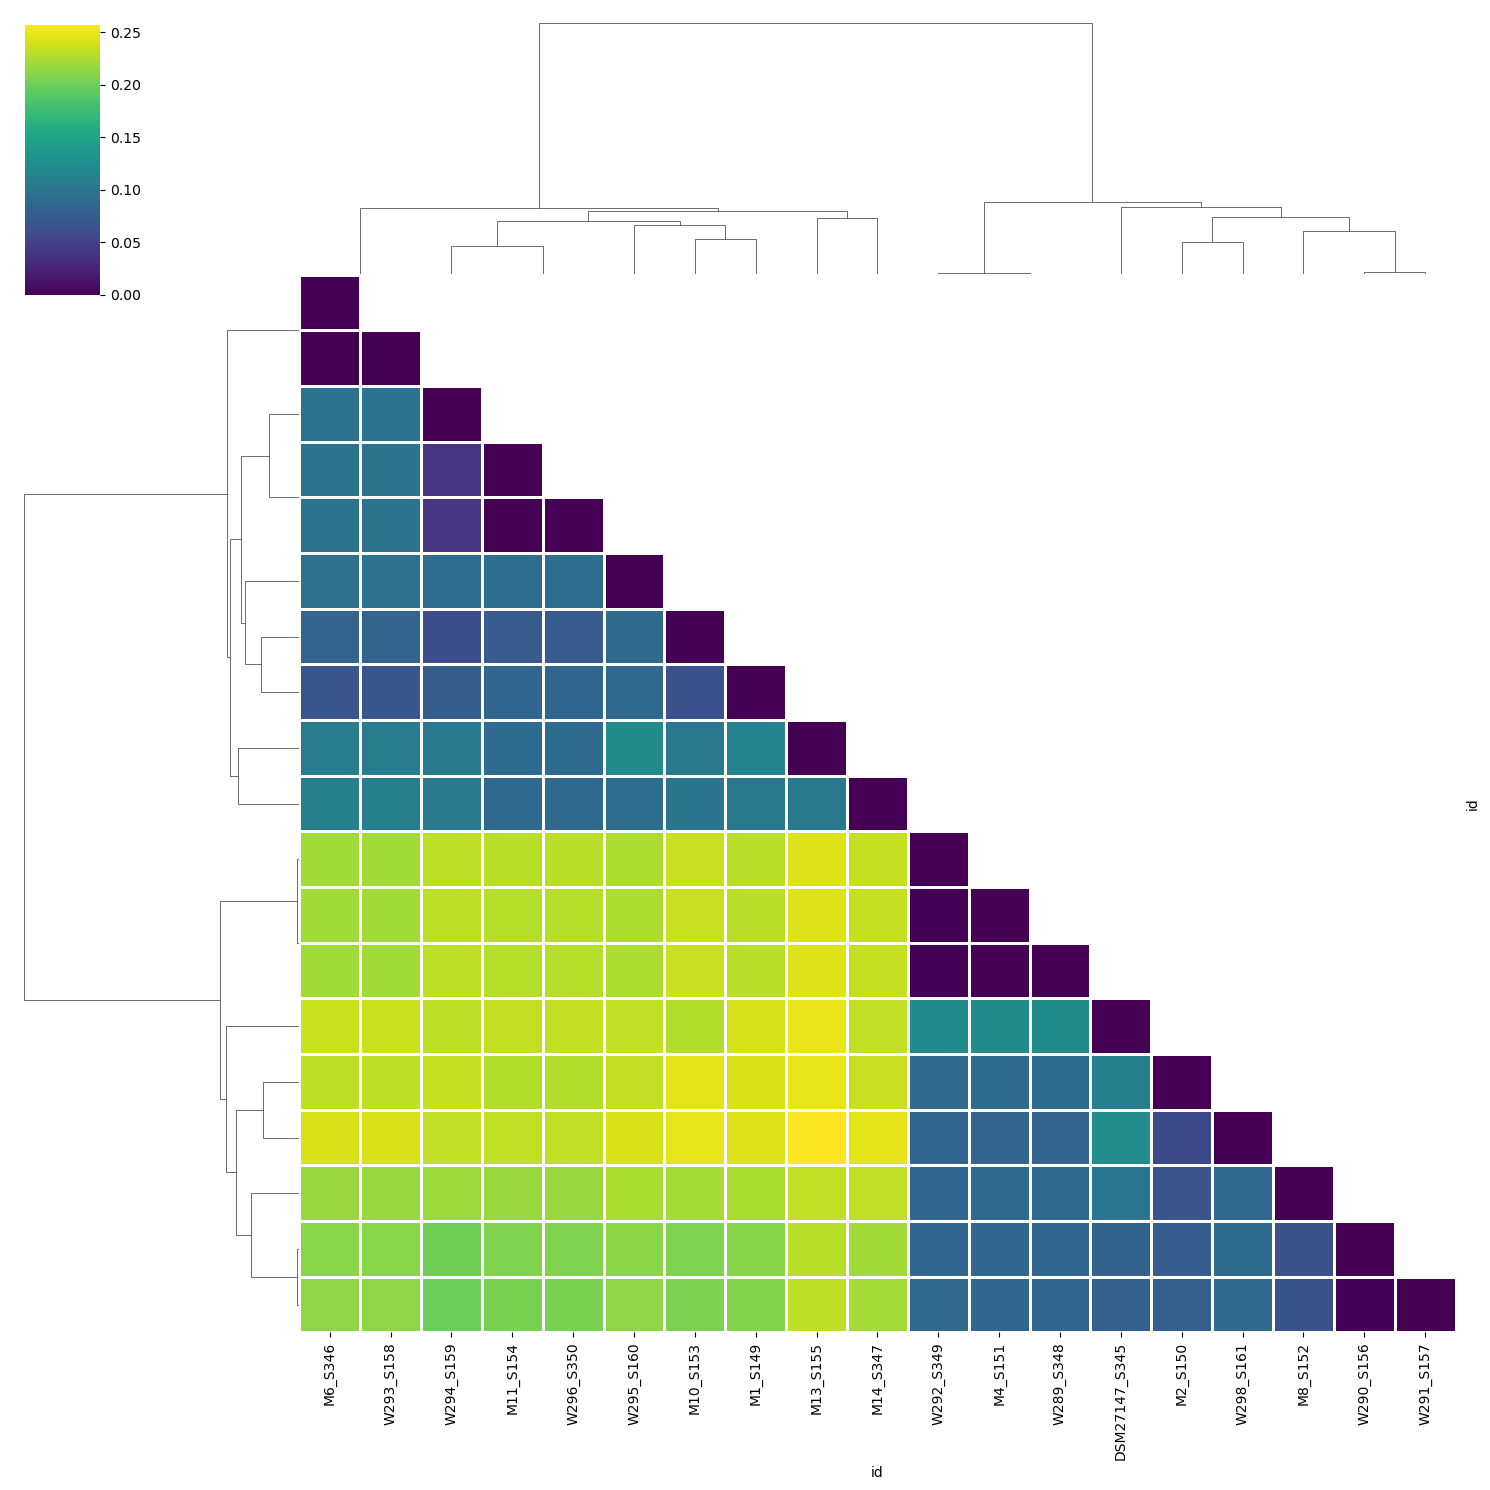

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

cmap = sns.husl_palette(5)

%matplotlib agg
mask = np.triu(np.ones(D.shape), k=1)
g = sns.clustermap(D, figsize=(1, 1))
mask = mask[np.argsort(g.dendrogram_row.reordered_ind),:]
mask = mask[:,np.argsort(g.dendrogram_col.reordered_ind)]

%matplotlib inline
sns.clustermap(D, mask=mask, yticklabels=False, cmap="viridis", xticklabels=True, figsize=(15, 15), linewidths=1)

Shown are the Jaccard distances between all strains. So a distance of 0.1 means that 10% of all reactions don't overlap in those strains. 

And we create the reaction matrix and save it.

In [4]:
import pandas as pd

reactions = com.reactions.query(lambda r: "m" not in r.compartments)
rids = [(r.global_id, r.name, r.community_id) for r in reactions]
rlist = pd.DataFrame(rids, columns=["reaction", "description", "id"])
rlist["value"] = 1
rlist = rlist.pivot_table(values="value", index="id", columns=["reaction", "description"])
rlist.index.name = "strain"
rxn_matrix = rlist.fillna(0).astype(int).T.reset_index()
rxn_matrix.to_csv("models/data/rxn_matrix.csv", index=False)
rxn_matrix

strain,reaction,description,DSM27147_S345,M10_S153,M11_S154,M13_S155,M14_S347,M1_S149,M2_S150,M4_S151,...,M8_S152,W289_S348,W290_S156,W291_S157,W292_S349,W293_S158,W294_S159,W295_S160,W296_S350,W298_S161
0,12DGR120tipp,"1,2 diacylglycerol transport via flipping (per...",1,1,1,1,1,1,1,0,...,1,0,1,1,0,1,1,1,1,1
1,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",1,0,0,0,0,0,1,1,...,1,1,1,1,1,0,0,0,0,1
2,12DGR141tipp,"1,2 diacylglycerol transport via flipping (per...",0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,1,1,0
3,12DGR160tipp,"1,2 diacylglycerol transport via flipping (per...",1,0,0,0,0,0,1,1,...,1,1,1,1,1,0,0,0,0,1
4,12DGR161tipp,"1,2 diacylglycerol transport via flipping (per...",0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,sink_hmfurn_c,R_sink_hmfurn_c,0,0,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1581,sink_lipopb_c,R_sink_lipopb_c,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1582,sink_mobd_c,R_sink_mobd_c,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1583,sink_mththf_c,R_sink_mththf_c,0,1,0,0,0,1,0,1,...,0,1,1,1,1,1,1,0,0,1


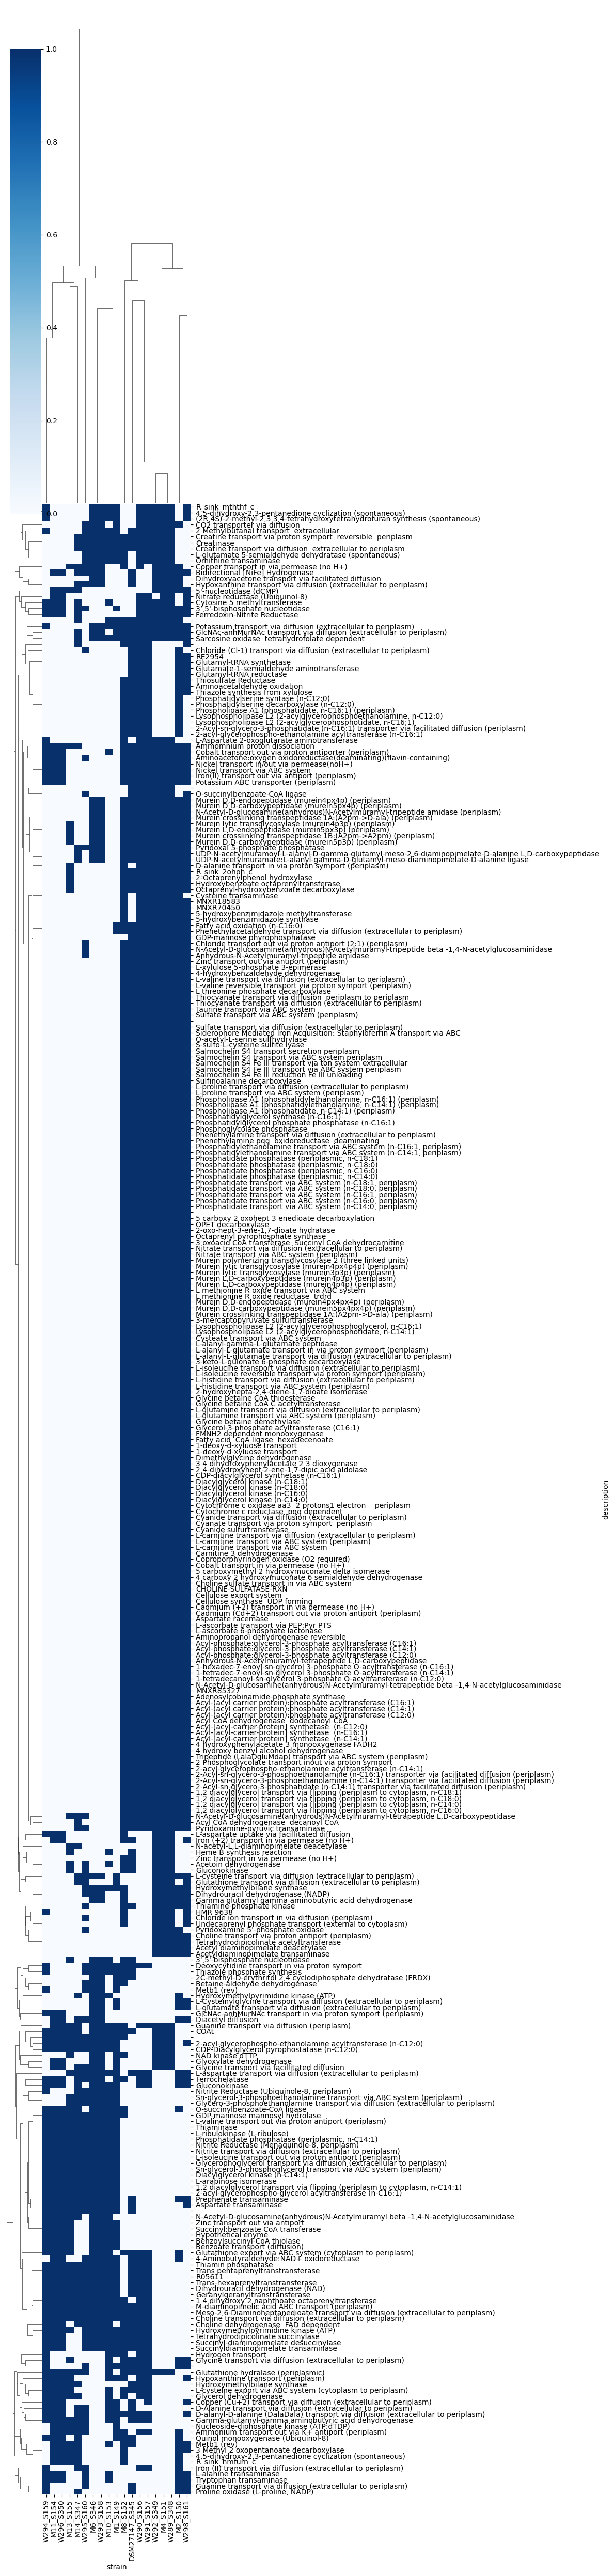

In [15]:
rxns = rxn_matrix.iloc[:, 2:]
rxns.index= rxn_matrix.description
rxns = rxns[rxns.var(1) > 0.2]

sns.clustermap(rxns, yticklabels=True, cmap="Blues", xticklabels=True, figsize=(12, 50))